In [14]:
# Import packages
import csv, sys, numpy as np, matplotlib.pyplot as plt, pandas as pd
from scipy.optimize import curve_fit
from scipy import optimize
from scipy.interpolate import griddata
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
import numpy.polynomial.polynomial as poly

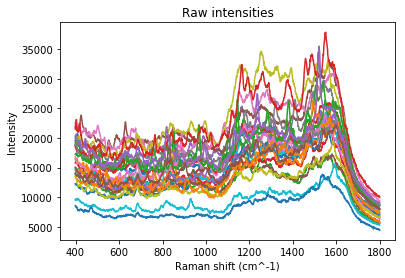

In [15]:
# Organize and plot raw data
rawdata = pd.read_csv('sers5au40.txt', delimiter="\t")
#to display all headers: print(list(rawdata.columns.values))
#shift = np.array(rawdata['ramanshift']) # name x-value array by the name of the header
shift = (rawdata.iloc[:,0]) # name x-value array by its column position (column 0)

rawdata2 = rawdata.copy()
rawspectra = rawdata2.drop(rawdata2.columns[[0]], axis=1) # remove 1st column (x-values) from spectra dataframe
spectraarray = rawspectra

for c in rawspectra.columns: #plot original raw spectra
    plt.plot(shift, rawspectra[c])
plt.title('Raw intensities')
plt.xlabel('Raman shift (cm^-1)'); plt.ylabel('Intensity'); plt.show()

In [16]:
#view all spectra as a heat map

n = np.arange(len(spectraarray)) #create spectra sample numbers

alln = np.array([]) #create single column of all spectra numbers
allshift = np.array([]) #create single column of all shifts
alli = np.array([]) #create single column of all intensities

for i in n: #create 1D arrays for each plot dimension
    alln = np.append(alln, np.ones(len(shift))*n[i])
    allshift = np.append(allshift, shift)
    alli = np.append(alli, spectraarray[i])

    
# set X, Y, and Z for plot
X, Y, Z, = allshift, alln, alli

# create x-y points to be used in heatmap
xi = np.linspace(X.min(),X.max(),1000)
yi = np.linspace(Y.min(),Y.max(),1000)
# Z is a matrix of x-y values
zi = griddata((X, Y), Z, (xi[None,:], yi[:,None]), method='cubic')

zmin = np.amin(alli)
zmax = np.amax(alli)

# Create the contour plot
CS = plt.contourf(xi, yi, zi, 15, cmap=plt.cm.rainbow,
                  vmax=zmax, vmin=zmin)
plt.colorbar()  
plt.xlabel('Raman shift (cm^-1)'); plt.ylabel('Spectrum number'); plt.title('All spectra'); plt.show()


KeyError: 0

In [ ]:
#find best spectra by calculating intensity variation of each spectrum

intensityvariation = np.ones(len(spectraarray))
for i in range(len(spectraarray)):
    intensityvariation[i] = np.amax(spectraarray[i]) - np.amin(spectraarray[i])

##########################################################################
nspec = 4 # how many of the highest-range spectra do you want?
##########################################################################
bestspecindicies = np.argpartition(intensityvariation, -nspec)[-nspec:] #highest-variance spectra indicies

bestspectracol = np.array([]) #create array for best spectra
for i in bestspecindicies: #scan best indicies through dataframe and collect best spectra
    bestspectracol = np.hstack((bestspectracol,spectraarray[i])) #stack all the best spectra   
bestspectra = bestspectracol.reshape(nspec,len(shift)) #reshape into matrix of best spectra

for i in range(len(bestspectra)):
    plt.plot(shift, bestspectra[i])
plt.title('Number of selected spectra = ' + format(nspec) + ', located at indicies ' +format(bestspecindicies))
plt.xlabel('Raman shift (cm^-1)'); plt.ylabel('Intensity'); plt.show()

#########################################################################################

#view only best spectra as heat map

bestn = np.arange(nspec) #create spectra sample numbers
bestalln = np.array([]) #create single column of all spectra numbers
bestallshift = np.array([]) #create single column of all shifts

for i in bestn: #create 1D arrays for each plot dimension
    bestalln = np.append(bestalln, np.ones(len(shift))*bestn[i])
    bestallshift = np.append(bestallshift,shift)

# set X, Y, and Z for plot
X, Y, Z, = bestallshift, bestalln, bestspectracol

# create x-y points to be used in heatmap
xi = np.linspace(X.min(),X.max(),1000)
yi = np.linspace(Y.min(),Y.max(),1000)
# Z is a matrix of x-y values
zi = griddata((X, Y), Z, (xi[None,:], yi[:,None]), method='cubic')

zmin = np.amin(bestspectracol)
zmax = np.amax(bestspectracol)

# Create the contour plot
CS = plt.contourf(xi, yi, zi, 15, cmap=plt.cm.rainbow,
                  vmax=zmax, vmin=zmin)
plt.colorbar()  
plt.xlabel('Raman shift (cm^-1)'); plt.ylabel('Spectrum number'); plt.title('Best spectra'); plt.show()


In [ ]:
#average best spectra together

avgbestintensity = np.reshape(bestspectracol,(nspec,len(shift)))
avgbestintensity = np.mean(avgbestintensity,axis=0)


xcoords = [1003, 1675] #plot vertical lines at peaks of interest
for xc in xcoords:
    plt.axvline(x=xc, linewidth=.5, color = 'k')

plt.plot(shift, avgbestintensity)
plt.xlabel('Raman shift (cm^-1)'); plt.ylabel('Intensity'); plt.title('Averaged best spectra'); plt.show()


In [17]:
spectraarray

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26
0,7412.56738,7161.55029,5607.05859,6514.34912,8014.40381,8607.16699,9360.21875,9078.95898,7778.50830,6750.24512,...,6214.94336,8634.38574,6798.63379,5289.50635,4497.13916,5703.83594,8096.06006,9952.98242,8840.03906,8074.88965
1,7484.41162,7160.17871,5653.07715,6660.14600,8085.54688,8791.90234,9266.69434,8973.87891,7610.28906,6837.29590,...,6451.14844,8654.56738,6601.44092,5258.67090,4572.27539,5797.93750,8023.82910,10145.55859,8921.02539,8084.97705
2,7637.05322,7068.56445,5734.26709,6725.65967,8044.86572,8793.37207,9239.78418,8769.89648,7601.69385,6875.12158,...,6404.04980,8590.29004,6628.71338,5324.13818,4474.49463,5775.72119,7912.13379,10006.65820,8934.08789,8169.24121
3,7510.65527,7179.99219,5668.58398,6699.47412,8163.89502,8828.28125,9254.46777,8862.15527,7749.99561,6773.68750,...,6475.95361,8814.11133,6605.42578,5317.34375,4489.77734,5939.46338,8123.61230,10201.38867,8825.47168,8099.78027
4,7553.62012,7214.06689,5657.38477,6747.47656,8107.58838,8809.78809,9242.30371,8997.55469,7697.64063,6954.67139,...,6590.48877,8780.43652,6614.32861,5344.94531,4548.73047,5886.75244,8132.85986,10191.16211,8865.91016,8179.62842
5,7641.65771,7167.83008,5677.82178,6726.02686,8064.43213,8757.92969,9497.35449,8851.11914,7784.05518,7016.72607,...,6575.04199,8726.61426,6636.44727,5379.15381,4567.24414,5886.82031,8158.68896,10193.00586,8950.43262,8125.36865
6,7637.97607,7249.28223,5767.12598,6758.51123,8167.57275,8772.86719,9496.29004,8923.53223,7832.24023,6878.62695,...,6507.37549,8793.69922,6766.32520,5381.25000,4647.30957,5892.88428,8235.65918,10167.38672,8948.63574,8097.53027
7,7669.29541,7453.62354,5787.61230,6688.44629,8219.06445,8934.04297,9664.73730,9022.23145,7817.67822,6800.08984,...,6515.53027,8850.29590,6664.69727,5400.88721,4550.12451,5932.33643,8201.57813,10236.55762,8998.28613,8188.39209
8,7557.75488,7209.19971,5694.57178,6575.80371,8133.29980,9089.77148,9556.36621,9170.45508,7804.83887,6861.42578,...,6601.53809,8863.91602,6607.51953,5390.06689,4559.93262,5951.86914,8333.64453,10238.10352,9033.35547,8225.46777
9,7823.59424,7277.11426,5632.47607,6671.68750,8237.51563,8867.38184,9711.93359,9034.58203,7800.63916,6976.47217,...,6682.80811,8875.40918,6721.96777,5463.17578,4610.23975,5945.47754,8418.12500,10158.05762,9106.69336,8135.15088


In [ ]:
%reset -f